In [1]:
#import of libraries
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---
# Exploratory Data Analysis on Lyft Bike-Share Data

For this project I am using the Lyft bike sharing trips data collected between Jan 2019 and May 2019 from the Bay Area (California). This data has been taken from Kaggle and is available at; https://www.kaggle.com/jolasa/bay-area-bike-sharing-trips

Let's begin by importing our data into pandas. This notebook assumes you're using Google Colab. Be sure to adust the "path" directory to the folder of CSV files.

In [21]:
#path must point to the folder with .CSV files.
path = r'/content/data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

#big frame with all csv data from Jan to May.
data = pd.concat(li, axis=0, ignore_index=True)
data.head()

,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,Februrary,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male
1,Februrary,42521,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN
2,Februrary,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,Februrary,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,Februrary,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male


In [22]:
data.shape

(1053067, 10)

There are 10 columns with over a million data entries. each collumn reffers to month, trip duration (seconds), start station id, start station name, end station id, endstation name, bike ID, user type, member  DOB and member genger. For several attributes such as Education, each datapoint is a representative for description as follows:

Month
1.   January
2.   February
3.   March
4.   April
5.   May

User Type
1.   Customer
2.   Subscriber

Member Gender
1.   Male
2.   Female


---
# Data Cleaning

Before we explore our data, lets clean up any missing values by deleting them. Due to the number of entries, deleting rows with missing attributes should not have a drastic affect on the exploration of the data later.

In [4]:
#Count missing values in each column.
data.isna().sum()

month                     0
trip_duration_sec         0
start_station_id        745
start_station_name      745
end_station_id          745
end_station_name        745
bike_id                   0
user_type                 0
member_birth_year     49376
member_gender         49370
dtype: int64

In [5]:
#drop any rows with missing values
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [6]:
#check if we have any missing attributes in any rows.
#True = rows with missing attributes.
#False = everything is populated.
data.isnull().values.any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002956 entries, 0 to 1053066
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   month               1002956 non-null  object 
 1   trip_duration_sec   1002956 non-null  int64  
 2   start_station_id    1002956 non-null  float64
 3   start_station_name  1002956 non-null  object 
 4   end_station_id      1002956 non-null  float64
 5   end_station_name    1002956 non-null  object 
 6   bike_id             1002956 non-null  int64  
 7   user_type           1002956 non-null  object 
 8   member_birth_year   1002956 non-null  float64
 9   member_gender       1002956 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 84.2+ MB


When we check what data types we're working with, some of the columns are of the incorrect type. For example, "start_station_id", "end_station_id" and "member_birth_year" are "float64" while they really should be "int64". Let's change this.

In [8]:
#Change the following fields to an appropriate data type.
data = data.astype({'start_station_id': np.int64})
data = data.astype({'end_station_id': np.int64})
data = data.astype({'member_birth_year': np.int64})

In [9]:
data.shape

(1002956, 10)

Once the null values have been removed, we shall take a look at the descriptive statistics  in the dataset below. As from the above code, the shape of the dataframe has not drastically changes, we still have over a million data entries to explore.

In [10]:
#Print all of the object data types and their unique values
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

month : ['Februrary' 'March' 'May' 'January' 'April']
March        244355
April        227848
January      182122
Februrary    174952
May          173679
Name: month, dtype: int64
_________________________________________________________________
start_station_name : ['Montgomery St BART Station (Market St at 2nd St)'
 'Market St at Dolores St' 'Grove St at Masonic Ave' 'Frank H Ogawa Plaza'
 '4th St at Mission Bay Blvd S' 'Palm St at Willow St'
 'Washington St at Kearny St' 'Post St at Kearny St' 'Jones St at Post St'
 'Civic Center/UN Plaza BART Station (Market St at McAllister St)'
 'Valencia St at 21st St' 'Bancroft Way at College Ave'
 'Howard St at Mary St' '22nd St at Dolores St' 'Laguna St at Hayes St'
 '5th St at Folsom' 'Telegraph Ave at 23rd St' 'Page St at Scott St'
 'Lake Merritt BART Station' 'West St at 40th St'
 'The Embarcadero at Sansome St' 'Folsom St at 9th St'
 'University Ave at Oxford St' 'MLK Jr Way at University Ave'
 'The Embarcadero at Bryant St' '17th St at V

---
# Data Visualisation

Let's start exploring our data, it may be best to see what collumns may correlate to what. Though this may not make much sense, since some the data isnt numerical, and some of the values repeat (such as bike_id). But lets do it anyway and see what shows.


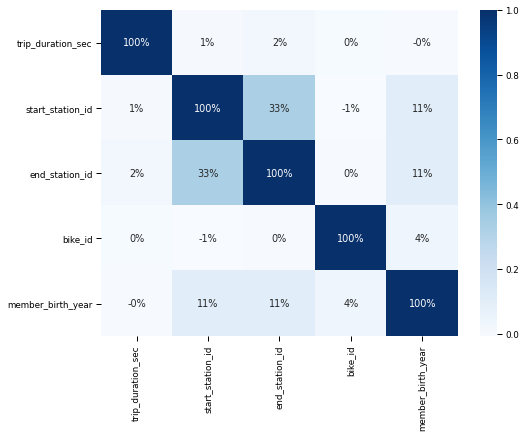

In [11]:
data_corr = data.corr()
data_corr
plt.figure(figsize=(8,6))
sns.set_context('paper')

sns.heatmap(data_corr, annot=True, cmap='Blues', fmt='.0%')

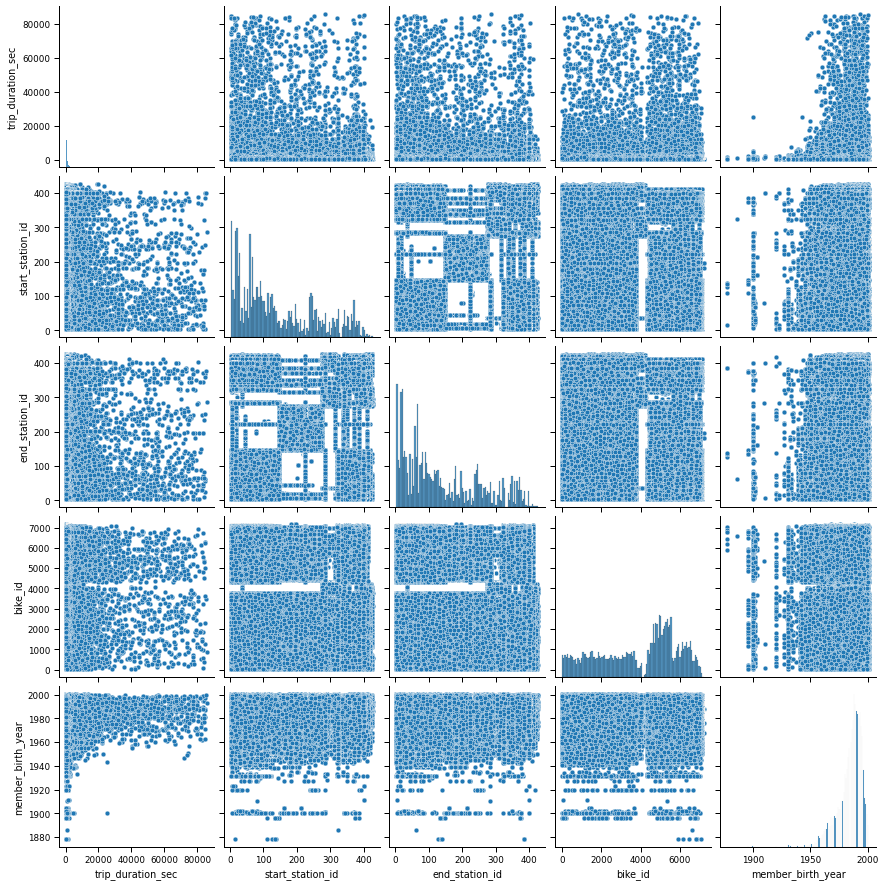

In [12]:
#broad look at data distribution
sns.pairplot(data)

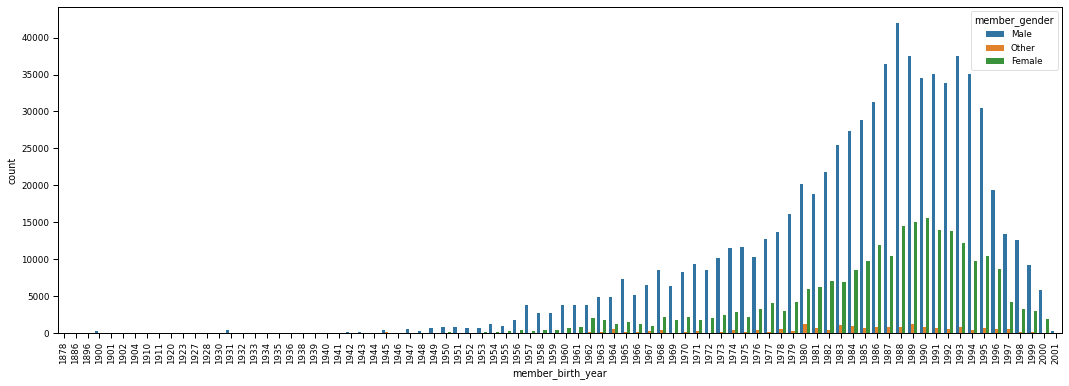

In [13]:
#count plot of members DOB
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
plt.xticks(rotation=90)
sns.countplot(x='member_birth_year', hue='member_gender', data=data, ax = ax)

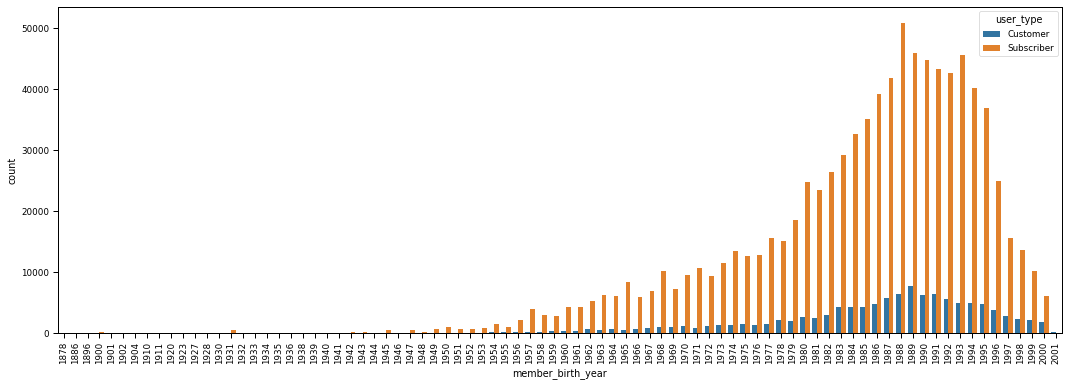

In [14]:
#count plot with hue
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
plt.xticks(rotation=90)
sns.countplot(x='member_birth_year', hue='user_type', data = data, ax = ax);

The above two graphs show the count of DOB, plotted with their gender and their user type. There seems to be a skew that leans to the left in both cases. Though, I feel it is important to note that there is no way to know the unique count of age to determine unique number of users. Though, this representation can give an idea of which age demogrpahic the bike share is most popular with.

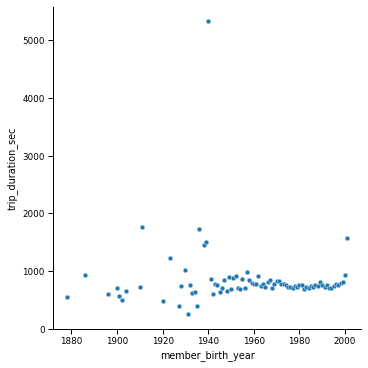

In [15]:
fig_dims = (12, 3)
#average trip duration by member birth year
data.groupby(['member_birth_year']).mean().pipe(lambda data: sns.relplot(data=data, x="member_birth_year", y="trip_duration_sec", kind="scatter"))


We can see when we plot member_birth_year with average trip duration the average duration of their trip against age.

There seems to be values far below the correlation of the data which suggests possible anomolies in the data regarding member_birth_year.

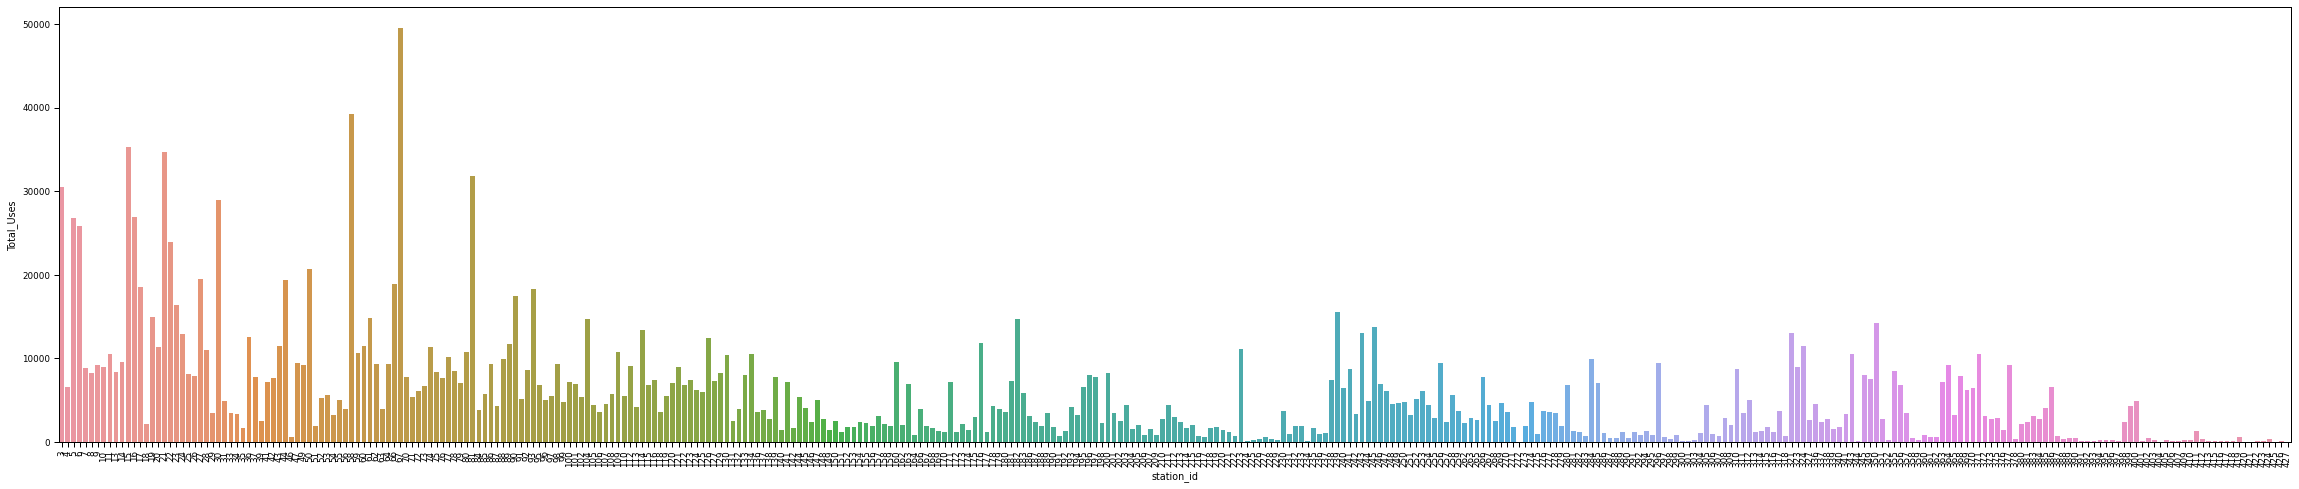

In [16]:
#station popularity
allstations = pd.DataFrame(columns=["Stations"]) # creating new dataframe
allstations = pd.concat([data['start_station_id'], data['end_station_id']])# "concating" the two columns

uniqueid = np.unique(allstations) # Returning all the unique values from the allstation dataframe that we created earlier.
stationsusage = pd.DataFrame(columns=["station_id","Total_Uses"]) # new dataframe
for row in uniqueid:
    temp1 = data[data.start_station_id == row]# As start station
    temp2 = data[data.end_station_id == row] # As end station
    tempsum = len(temp1)+len(temp2) # sum
    stationsusage = stationsusage.append({'station_id':row,'Total_Uses':tempsum}, ignore_index=True) # add row on our dataframe

#plot graph
fig_dims = (40, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#ax = axis
plt.xticks(rotation=90)
sns.barplot(data=stationsusage, x='station_id', y='Total_Uses')

The above graph shows the total uses of a bike station, per its bike ID. I had attempted to plot this with the bike station name but the x axis was illegable. We can see some station have more popularity than others. Specifically double-digit station ID's which where possible placed in key areas with a high flow of people.

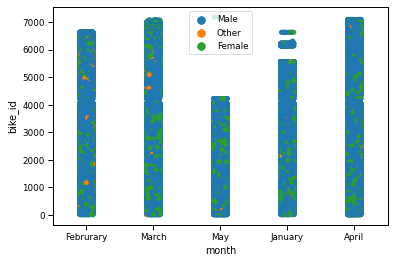

In [17]:
#box plot gender, unique users and member age
sns.stripplot(x='month', y='bike_id', data=data, hue='member_gender' )
plt.legend(loc=0)

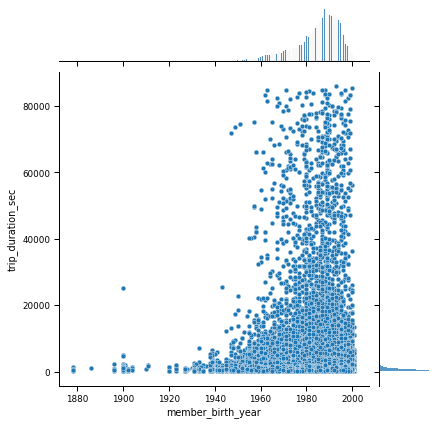

In [18]:
#the members age and trip duration
sns.jointplot(x='member_birth_year', y='trip_duration_sec', data=data)

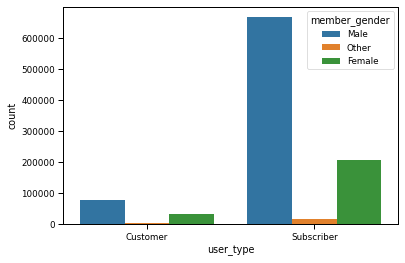

In [19]:
#count of user_type with split into member_gender
sns.countplot(data=data, x='user_type', hue='member_gender')

The above chart represents the type of user and the count of how many times a user has used the service in the given 5 month period.



---


# Hypothesis Formulation

From the above graphs, we got some insight about the data. Since this data can be used to make a prediciton based on age group of the user, and if they are a customer or subscriber to understand how much they are likely to use the service and to what capacity, we have to know the attributes that has positive or negative and strong or weak correlation with usage. Here I made several hypotheses regarding to this matter.


First hypothesis

**H0** = The younger the user, the more likely they are going to use the service.

**Ha** = The older the user, the more likely they are going to use the service.

Second hypothesis

**H0** = The younger the member, the longer they will use the service.

**Ha** = The older the member, the longer they will use the service.

Third hypothesis

**H0** = Popular stations are more likely to be used by subscribers.

**Ha** = Popular stations are less likely to be used by subscribers.


---
#Hypothesis Testing & Result

To test the hypothesis, I made a new chart bellow consisting of member_gender attribute, plotted to a historgram. If the hypothesis is true, we should see a left-skewed regression line. Else, if false, a right-skewed regression line. For extra exploration I have added the gender attribute as well.


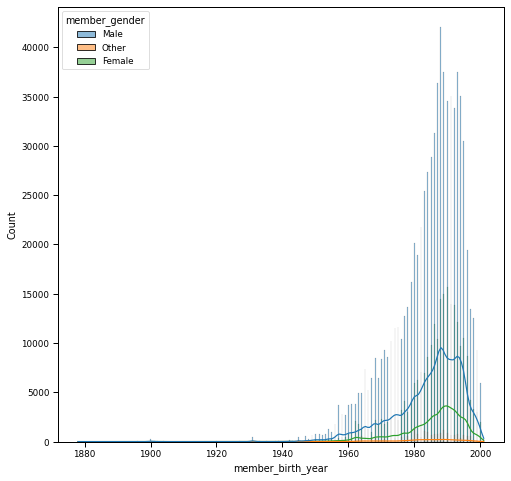

In [20]:
#histogram of age

#plot graph
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data=data, x="member_birth_year", kde=True, hue="member_gender")

As shown above, the majority concesos of users lay around the "1990" area of the chart... While the regression line drops sharply off with anyone younger than 1995, or for anyone who may be older than 1990.

Further to this, we can see the majority of users are mail, however, there regression line is flatter for females as opposed to males. This may indicate that there is a higher likelyhood that the bike-sharing service appeals to a broader age demogaphic for woman than for men.

---
# Summary

For further analysis, I suggest that we can do more insight finding in each variable through feature engineering, for example, reating unique counts of bikes at locations to understand how many times a location may be used. Further to this, involving other data sources such as map data to understand popularity distribution of the bikes and map out rough travel through the trip_duration_sec attribute. Thus, estimating the type of journey a bike may make.

There are some items missing from the dataset that could've been useful, such as time & date, distanc travelled by each bike or even a recalcualted ID per each user, to document multiple uses by the same member, thus understanding customer behaviour.